In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

from ooijh import OPTAA

## Define Data Parameters

In [2]:
site = 'CE02SHBP'
node = 'LJ'
bdt = datetime(2019,7,1)
edt = datetime(2019,7,30)

## Instantiate A Data Class With Parameters

In [3]:
optaa = OPTAA(site, node, begin_datetime = bdt, end_datetime = edt)

In [4]:
print(f"{len(optaa.files)} files found for the supplied inputs.")
optaa.files

2 files found for the supplied inputs.


['/home/jovyan/ooi/kdata/CE02SHBP-LJ01D-08-OPTAAD106-streamed-optaa_sample/deployment0006_CE02SHBP-LJ01D-08-OPTAAD106-streamed-optaa_sample_20190623T035841.874879-20190713T215959.774556.nc',
 '/home/jovyan/ooi/kdata/CE02SHBP-LJ01D-08-OPTAAD106-streamed-optaa_sample/deployment0006_CE02SHBP-LJ01D-08-OPTAAD106-streamed-optaa_sample_20190713T220000.026506-20190809T055959.991438.nc']

## Obtain Data From The Above Files

In [5]:
%%time
optaa_ds = optaa.get_data()

CPU times: user 1min 10s, sys: 1min 9s, total: 2min 19s
Wall time: 2min 21s


In [6]:
optaa_ds

<xarray.Dataset>
Dimensions:               (time: 695, wavelength: 311)
Coordinates:
  * wavelength            (wavelength) int64 410 411 412 413 ... 717 718 719 720
  * time                  (time) datetime64[ns] 2019-07-01 ... 2019-07-29T22:...
Data variables: (12/13)
    a_pg_ts               (time, wavelength) float64 0.4289 0.4257 ... 0.07316
    a_pg_ts_baseline      (time, wavelength) float64 0.3013 ... -0.0007019
    a_pg_ts_fixed         (time, wavelength) float64 0.3704 0.367 ... 0.01038
    a_pg_ts_proportional  (time, wavelength) float64 0.3039 ... -0.0006341
    c_pg_ts               (time, wavelength) float64 0.7538 0.7522 ... 0.4219
    chl_alh               (time) float64 0.9883 0.8962 1.019 ... 0.03347 0.06083
    ...                    ...
    elapsed_time          (time, wavelength) float64 1.155e+05 ... 8.604e+04
    poc                   (time) float64 180.6 164.1 176.0 ... nan 161.6 172.1
    ratio_carotenoids     (time) float64 0.5004 0.4975 0.499 ... 0.484 0.4909
    ratio_cdom            (time) float64 1.407 1.418 1.409 ... nan 1.452 1.434
    ratio_phycobilins     (time) float64 0.2795 0.2704 0.2779 ... 0.2749 0.2839
    ratio_qband           (time) float64 0.07695 0.07093 ... 0.03694 0.04031
Attributes: (12/27)
    Conventions:                     CF-1.6
    Description:                     Spectrophotometer: OPTAA Series D
    Manufacturer:                    WET Labs
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    ModelNumber:                     AC-S
    comment:                         This is a combined dataset file from all...
    ...                              ...
    node:                            LJ01D
    project:                         Ocean Observatories Initiative
    references:                      More information can be found at http://...
    sensor:                          08-OPTAAD106
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    subsite:                         CE02SHBP

## Format Data For A 3D Plot

In [7]:
y = optaa_ds.time.values.astype(float)
x = optaa_ds.wavelength
x,y = np.meshgrid(x,y)
z = optaa_ds.a_pg_ts_proportional

## Plot Data

Text(0.5, 0, 'Absorption (1/m)')

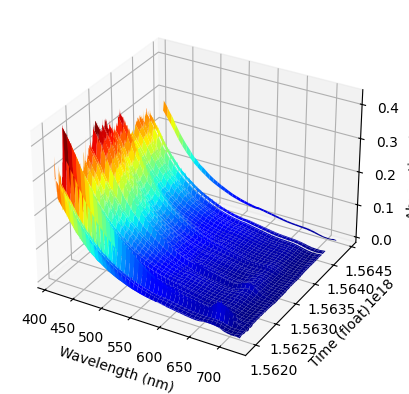

In [8]:
#%matplotlib widget #Uncomment this line to make the plot interactive.
fig, ax = plt.subplots(1,1, subplot_kw = {'projection':'3d'})
ax.plot_surface(x,y,z, cmap = 'jet')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Time (float)')
ax.set_zlabel('Absorption (1/m)')